Importing the Libraries

In [99]:
import pandas as pd
import numpy as np

Loading the  Data

In [100]:
data= pd.read_csv("OnlineRetail.csv",encoding="latin 1")
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Understanding the Data

In [101]:
print("Show number of records:")
print(data.shape)

Show number of records:
(541909, 8)


In [102]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [103]:
features=data.columns.tolist()
print("features:",features)

features: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [104]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Cleansing the Data

In [105]:
print("Show existence of missing values:")
print(data.isnull().sum())

Show existence of missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [106]:
df_null=round(100*(data.isnull().sum())/len(data),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [107]:
data=data.dropna()
data.shape

(406829, 8)

In [108]:
data=data.drop('StockCode', axis=1)  

In [109]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Converting Data

In [110]:
data['CustomerID']=data['CustomerID'].astype(str)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   Description  406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  object 
 6   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


Preparing Data

In [112]:
data['Amount']=data['Quantity']*data['UnitPrice']
data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


Calculating the total amount for each customer

In [113]:

rfm_m=data.groupby('CustomerID')['Amount'].sum()
rfm_m=rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Showing the highest sold product

In [114]:
monetary_data= data.groupby("Description")['Quantity'].sum()
monetary_data= monetary_data.reset_index()
monetary_data.sort_values(by="Quantity",ascending=False).head()

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


Showing the country with the highest sales

In [115]:
most_bought_product = data.groupby("Country")['Quantity'].sum()
most_bought_product = most_bought_product.reset_index()
most_bought_product.sort_values(by='Quantity', ascending=False).head()

,Country,Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848


Showing the most bought item

In [116]:
monetary_data = data.groupby("Description")['InvoiceNo'].count()
monetary_data = monetary_data.reset_index()
monetary_data.sort_values(by="InvoiceNo", ascending=False)

,Description,InvoiceNo
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070
2780,REGENCY CAKESTAND 3 TIER,1905
1771,JUMBO BAG RED RETROSPOT,1662
217,ASSORTED COLOUR BIRD ORNAMENT,1418
2355,PARTY BUNTING,1416
...,...,...
453,BLUE NEW BAROQUE FLOCK CANDLESTICK,1
1720,IVORY SHELL HEART EARRINGS,1
457,BLUE PAINTED KASHMIRI CHAIR,1
1712,IVORY PANTRY HANGING LAMP,1


In [117]:
dt=data.Description.value_counts()
dt

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64

In [118]:
region = data.groupby("CustomerID")['Country'].count()
region = region.reset_index()
region

,CustomerID,Country
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [119]:
data['InvoiceDate']=pd.to_datetime(data["InvoiceDate"],format='%m/%d/%Y %H:%M')
data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Description  406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  object        
 6   Country      406829 non-null  object        
 7   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Computing the maximum date to know the last transaction date

In [121]:
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

Computing the minimum date to know the last transaction date

In [122]:
min_date = min(data['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

In [123]:
dt = max_date - min_date
dt

Timedelta('373 days 04:24:00')

Total sales over the last one month

In [124]:
from datetime import timedelta
one_month_ago = max_date - timedelta(days=30)
last_month_data = data[data['InvoiceDate'] >= one_month_ago ]
total_sales_last_month = last_month_data['Amount'].sum()
total_sales_last_month



1156014.39

Total sales number over the last one month

In [125]:
total_sales_number_last_month = last_month_data['Amount'].count()
print(f"{total_sales_number_last_month} transactions")

66632 transactions


In [126]:
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Merging the two dataframes

In [127]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [128]:
data['Diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


Computing the last transaction date to get the recency of customers

In [129]:

rfm_p = data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


Extracting number of days only

In [130]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Merging tha dataframes to get the final RFM dataframe

In [131]:
new_df = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
new_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
new_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Importing required libraries for clustering

In [132]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Rescaling the attributes

In [133]:

features = new_df[['Amount', 'Frequency', 'Recency']]

Instantiate

In [134]:
scaler = StandardScaler()

fit_transform

In [135]:
scaled_features = scaler.fit_transform(features)
scaled_features.shape

(4372, 3)

In [136]:
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.columns = ['Amount', 'Frequency', 'Recency']
scaled_features_df.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


Building the KMeans model

In [137]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_features_df)

KMeans(max_iter=50, n_clusters=4)

In [138]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
fits = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_features_df)
    
    fits.append(kmeans.inertia_)
    

Plotting the SSDs for each n_clusters

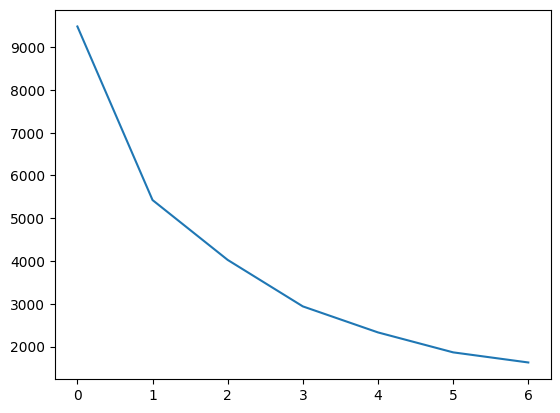

In [141]:
plt.plot(fits)

 Silhouette analysis

In [142]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_features_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9344641162235822
For n_clusters=3, the silhouette score is 0.9406189556359839
For n_clusters=4, the silhouette score is 0.5988212333130106
For n_clusters=5, the silhouette score is 0.6175722066751771
For n_clusters=6, the silhouette score is 0.5099415022209737
For n_clusters=7, the silhouette score is 0.5238467453014489
For n_clusters=8, the silhouette score is 0.4365126169856286


Final model with k=3

In [143]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_features_df)

KMeans(max_iter=50, n_clusters=3)

Assigning the label

In [144]:
new_df['Cluster_Id'] = kmeans.labels_
new_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


Box plot to visualize Cluster Id vs Amount

<Axes: xlabel='Cluster_Id', ylabel='Amount'>

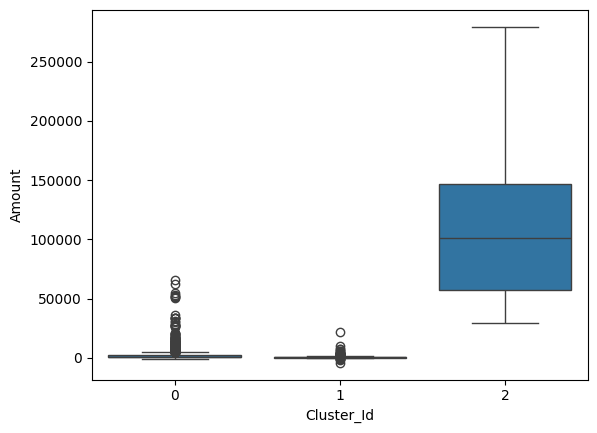

In [145]:
sns.boxplot(x='Cluster_Id', y='Amount', data=new_df)

Box plot to visualize Cluster Id vs Frequency


<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

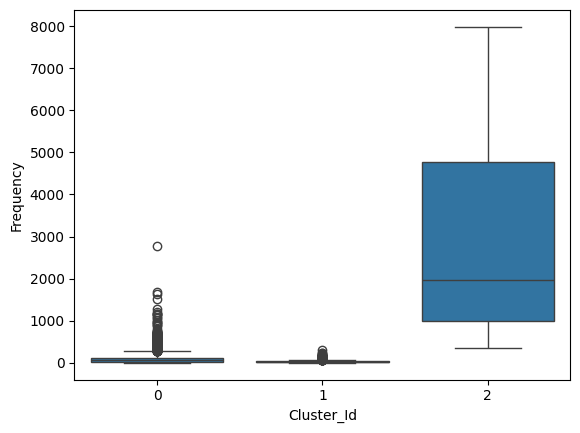

In [146]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=new_df)

Box plot to visualize Cluster Id vs Recency

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

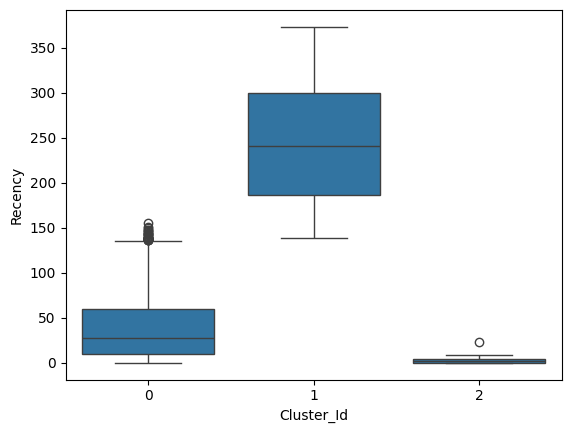

In [147]:
sns.boxplot(x='Cluster_Id', y='Recency', data=new_df)